# 📘 Predicción de Cupos por Materia usando LSTM

Este notebook carga el dataset unificado de oferta académica, lo preprocesa, y entrena un modelo LSTM para predecir el número de cupos ofertados por materia en semestres futuros.

In [7]:
# 📦 Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 📥 Cargar el dataset unificado
df = pd.read_csv("oferta_academica_unificada.csv")

# Mostrar estructura
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NRC                3114 non-null   float64
 1   Clave              3114 non-null   object 
 2   Materia            3114 non-null   object 
 3   Sec                3114 non-null   object 
 4   CR                 3114 non-null   float64
 5   CUP                3114 non-null   float64
 6   DIS                3114 non-null   float64
 7   Ses                3686 non-null   float64
 8   Hora               3686 non-null   object 
 9   Dias               3686 non-null   object 
 10  Edif               3614 non-null   object 
 11  Aula               3485 non-null   object 
 12  Periodo            3686 non-null   object 
 13  Ses.1              3080 non-null   float64
 14  Profesor           3080 non-null   object 
 15  semestre_numerico  3798 non-null   int64  
 16  semestre_original  3798 

,NRC,Clave,Materia,Sec,CR,CUP,DIS,Ses,Hora,Dias,Edif,Aula,Periodo,Ses.1,Profesor,semestre_numerico,semestre_original
0,103863.0,I5902,ADMINISTRACION DE BASES DE DATOS,D01,8.0,40.0,0.0,1.0,0700-0855,L . I . . .,DEDX,A018,22/02/21 - 06/07/21,1.0,"URIBE NAVA, SERGIO JAVIER",4042,2021A
1,119874.0,I5902,ADMINISTRACION DE BASES DE DATOS,D02,8.0,40.0,18.0,1.0,1300-1455,L . I . . .,DEDX,A002,22/02/21 - 06/07/21,1.0,"MURILLO LEAÑO, MARIA MAGDALENA",4042,2021A
2,119875.0,I5902,ADMINISTRACION DE BASES DE DATOS,D03,8.0,40.0,32.0,1.0,0900-1055,L . . . . .,DEDX,A013,22/02/21 - 06/07/21,1.0,"RETAMOZA VEGA, PATRICIA DEL ROSARIO",4042,2021A
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0900-1055,. . I . . .,DEDX,A018,22/02/21 - 06/07/21,NaN,NaN,4042,2021A
4,119876.0,I5902,ADMINISTRACION DE BASES DE DATOS,D04,8.0,40.0,34.0,1.0,0900-1055,. M . J . .,DEDX,A002,22/02/21 - 06/07/21,1.0,"ARREOLA GONZALEZ, MAURICIO RODOLFO",4042,2021A


In [ ]:
# 🧹 Preprocesamiento
# Eliminar registros con CUP nulo o sin clave
df = df.dropna(subset=["Clave", "CUP"])

# Codificar variables categóricas
le_clave = LabelEncoder()
df['Clave_encoded'] = le_clave.fit_transform(df['Clave'])

# Selección de columnas relevantes
features = ['Clave_encoded','CUP', 'SEC'semestre_numerico']
target = 'CUP'

# Escalado
scaler = MinMaxScaler()
df[features + [target]] = scaler.fit_transform(df[features + [target]])

In [9]:
# 🧱 Crear secuencias para LSTM por materia
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

X_total, y_total = [], []
n_steps = 3

for clave in df['Clave_encoded'].unique():
    grupo = df[df['Clave_encoded'] == clave].sort_values('semestre_numerico')
    values = grupo[features + [target]].values
    if len(values) > n_steps:
        X_seq, y_seq = create_sequences(values, n_steps)
        X_total.append(X_seq)
        y_total.append(y_seq)

X = np.vstack(X_total)
y = np.concatenate(y_total)

print("Secuencias generadas:", X.shape)

Secuencias generadas: (3000, 3, 4)


In [10]:
# 🧠 Definir modelo LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 🏋️‍♂️ Entrenar el modelo
history = model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
94/94 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/50
94/94 [==============================] - 0s 1ms/step - loss: nan
Epoch 14

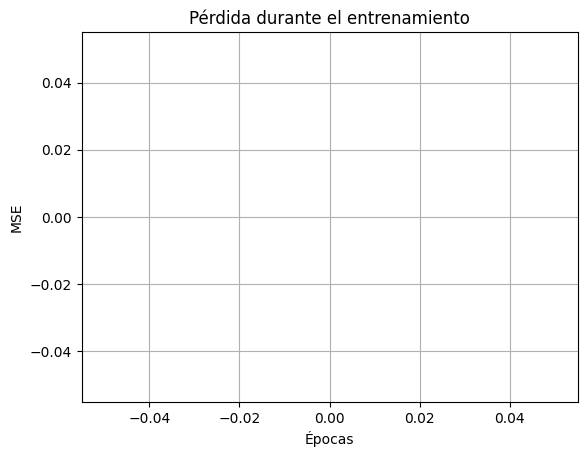

In [11]:
# 📈 Visualizar pérdida
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [12]:
# 💡 Predicción de ejemplo
X_test = X[-1].reshape(1, n_steps, len(features))
y_pred = model.predict(X_test)
print("Cupo estimado próximo semestre:", scaler.inverse_transform([[0, 0, 0, 0, y_pred[0][0]]])[-1][-1])

1/1 [==============================] - 0s 81ms/step
Cupo estimado próximo semestre: nan
